# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
#As only train the RNN on the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) #fit the object into the training set and transform it for each stock prices

### Creating a data structure with 60 timesteps(Each time t, the RNN is gonna look at the 60 stock prices before time t and based on that, it will try to predict the next output) and 1 output

In [4]:
X_train = [] #input of NN, contains 60 previewsstockprices before the financial day
y_train = [] #Output, contain stockprice the next financial day
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #to get the stockprices from 0 to 60
    y_train.append(training_set_scaled[i, 0]) #To get next value after 60
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
#To add a new dimension in a numpy array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential() #To represent a sequence of layers. The value is continous.

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #units are the no of cells in the LSTM, input shape is the shape of the input in 3d
regressor.add(Dropout(0.2)) #Add dropout regularization to avoid Overfitting

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0015
Epoch 2/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0015
Epoch 3/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0013
Epoch 4/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0014
Epoch 5/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0014
Epoch 6/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0015
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0015
Epoch 8/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0013
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0012
Epoch 13/100
38/38 [==

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

## Part 3 - Making the predictions and visualising the results

In [17]:
print(regressor.get_weights())

[array([[-0.08002789,  0.22362812, -0.04939863,  0.09390194, -0.01454234,
         0.63065577,  0.31904924,  0.11809219, -0.02001577,  0.10290822,
         0.04322473,  0.07825394, -0.04041405,  0.36140049,  0.61922723,
         0.47015598, -0.08718356,  0.02382443,  0.02319332, -0.13978468,
        -0.18767057,  0.18909219, -0.13462563, -0.21390481,  0.13822109,
         0.11128758,  0.34249893,  0.291655  ,  0.0519161 ,  0.31783214,
         0.51388973,  0.25598243,  0.06589556,  0.0906903 ,  0.21477611,
         0.02881957,  0.5778158 ,  0.60857946,  0.00970531,  0.06868176,
         0.15932916,  0.08415878,  0.11716613,  0.0053213 ,  0.15135509,
         0.29792434, -0.00484391, -0.13055152, -0.04582893,  0.7311085 ,
        -0.21927309, -0.12897575, -0.21290384, -0.03454754, -0.11867618,
        -0.26327485, -0.12864457, -0.19244781, -0.08931284,  0.07858324,
        -0.07975888,  0.0254165 , -0.16874465, -0.19866142, -0.21620749,
        -0.1361738 , -0.08134705,  0.11565415, -0.

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

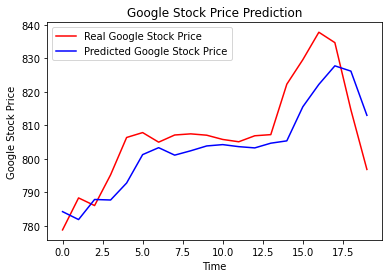

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [29]:
print(history.history.keys())

dict_keys(['loss'])


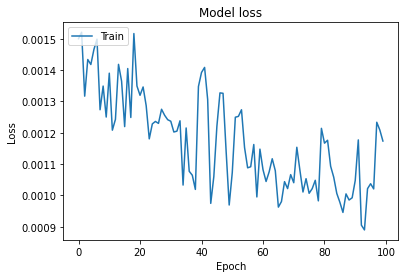

In [31]:
# Plot for Loss vs Epoch
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()